In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from time import sleep
import json

## Load the json file

In [2]:
with open('movie_detail.json', 'r') as f:
    movie_detail=json.load(f)

# Clean the data

In [3]:
clean_data = {'id':[],'runtime':[],'genres':[],'keywords':[],'production_companies':[],'age_rating':[],'actor':[],
              'budget':[], 'popularity':[]}
i=0
for movie in movie_detail:
    if(i==6106):
        break
    i+=1
    st = False
    #print(movie["release_dates"]['results'])
    for certification in movie["release_dates"]['results']:
        if (certification["iso_3166_1"] == 'US'):
            st = True
            clean_data['age_rating'].append(certification['release_dates'][0]["certification"])
            break
    
    if st==False:
        continue
        
    # id
    clean_data['id'].append(movie['id'])
    
    # runtime
    clean_data['runtime'].append(movie['runtime'])
    
    #genres
    genres_list = []
    for genre in movie['genres']:
        genres_list.append(genre['id'])
    clean_data['genres'].append(genres_list)
    keywords_list = []
    for keywords in movie['keywords']['keywords']:
        keywords_list.append(keywords['name'])
    clean_data['keywords'].append(keywords_list)
    production_companies = []
    for production in movie['production_companies']:
        production_companies.append(production['id'])
    clean_data['production_companies'].append(production_companies)
    
    #Cast
    actor_list = []
    for actor in movie['credits']['cast']:
        actor_list.append(actor['id'])
    clean_data['actor'].append(actor_list)
    
    #budget
    clean_data['budget'].append(movie['budget'])

    #budget
    clean_data['popularity'].append(movie['popularity'])
    

In [4]:
df_clean_data = pd.DataFrame(clean_data)
df_clean_data

,id,runtime,genres,keywords,production_companies,age_rating,actor,budget,popularity
0,527774,107,"[16, 12, 14, 10751, 28]","[kung fu, trip, sword, warrior woman, computer...","[2, 6125]",PG,"[1663195, 1625558, 2362044, 97576, 18307, 3008...",0,4135.696
1,587807,101,"[28, 35, 10751, 16, 12]","[computer animation, racial stereotype, live a...","[25120, 174, 8922, 77061]",PG,"[13620, 33923, 15098, 15831, 224092, 1688196, ...",50000000,2347.397
2,484718,110,[35],"[africa, prince, heir to the throne, sequel, q...","[4, 114732, 30, 11581, 20580]",PG-13,"[776, 44994, 1488960, 168452, 56903, 1884703, ...",60000000,1643.016
3,458576,104,"[14, 28, 12]","[female soldier, another dimension, bow and ar...","[7220, 47, 248, 81620, 882, 3287, 34]",PG-13,"[63, 57207, 76126, 2372, 935201, 22122, 105605...",60000000,1765.484
4,464052,151,"[14, 28, 12]","[dc comics, superhero, based on comic, 1980s, ...","[9993, 174, 114152, 128064, 507, 429]",PG-13,"[90633, 62064, 41091, 1253360, 32, 935, 182998...",200000000,1914.199
...,...,...,...,...,...,...,...,...,...
5462,25749,92,"[53, 27]","[chicago, illinois, telekinesis, cult, blood s...","[15343, 4416]",R,"[133665, 133968, 79740, 133969, 133970, 42743,...",0,14.252
5463,57718,16,"[16, 28, 35, 10751]",[],[521],PG,"[23659, 212, 1677820, 1784320, 583872, 76745, ...",0,16.255
5464,9517,113,"[80, 18]","[rape, florida, striptease, sadism, conspiracy...","[694, 126041, 15231, 8682]",,"[51214, 6408, 54126, 10692, 32598, 11671, 5738...",0,14.902
5465,15997,73,"[16, 10751, 12]","[tyrannosaurus rex, triceratops, brontosaurus,...",[4285],G,"[79020, 71447, 79021, 34982, 43125, 586496, 96...",0,15.000


In [8]:
word_list = []
for l in df_clean_data['keywords'].tolist():
    word_list += l
word_list

['kung fu',
 'trip',
 'sword',
 'warrior woman',
 'computer animation',
 'dragon',
 'vietnamese',
 'south asian',
 'warrior',
 'computer animation',
 'racial stereotype',
 'live action and animation',
 'rapping animal',
 'autotune',
 'africa',
 'prince',
 'heir to the throne',
 'sequel',
 'queens, new york city',
 'female soldier',
 'another dimension',
 'bow and arrow',
 'based on video game',
 'swordswoman',
 'dimensional travel',
 'giant monsters',
 'dc comics',
 'superhero',
 'based on comic',
 '1980s',
 'action hero',
 'dc extended universe',
 'revenge',
 'car crash',
 'person on fire',
 'convict',
 'rapist',
 'prisoner transport',
 'android',
 'space colony',
 'space opera',
 'space adventure',
 'spaceship',
 'ecological disaster',
 'post traumatic stress disorder',
 'rape',
 'marseille, france',
 'army',
 'revenge',
 'siblings',
 'detective',
 'serial killer',
 'los angeles, california',
 '1990s',
 'cyborg',
 'nuclear missile',
 'war',
 'based on novel or book',
 'love',
 'teena

In [12]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec([word_list], size= 100, window=10 , min_count = 10)

In [32]:
model.most_similar('police')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('world war ii', 0.9999433755874634),
 ('sequel', 0.9999380111694336),
 ('based on a true story', 0.9999357461929321),
 ('friendship', 0.9999345541000366),
 ('based on novel or book', 0.9999326467514038),
 ('survival', 0.9999312162399292),
 ('supernatural', 0.9999309182167053),
 ('computer animation', 0.9999302625656128),
 ('superhero', 0.9999299645423889),
 ('murder', 0.9999289512634277)]

In [33]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


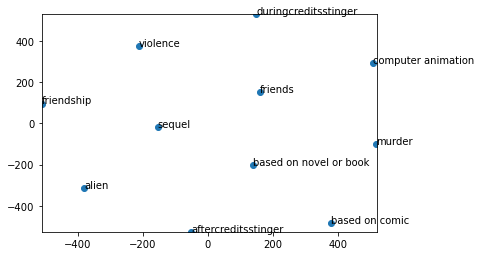

In [34]:
display_closestwords_tsnescatterplot(model, "friends", 100)